<a href="https://www.kaggle.com/code/mrafraim/dl-day-19-phase-02-summary-day-9-18?scriptVersionId=288515889" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Phase 02 Summary: Day 9–18 

Welcome to Day 19!

This notebook consolidates everything learned so far:

- Consolidate learning from Forward Propagation, Backpropagation, and PyTorch basics
- Visualize key concepts: neurons, activations, loss curves, bias-variance
- Provide ready-to-use code snippets for future reference


If you found this notebook helpful, your **<b style="color:red;">UPVOTE</b>** would be greatly appreciated! It helps others discover the work and supports continuous improvement.

---

# Topics Summary

1. **Forward Propagation**: manual calculation and Numpy implementation  
2. **Activation Functions**: ReLU, Sigmoid, Tanh with visualizations  
3. **Backpropagation**: chain rule, manual and Numpy implementation  
4. **PyTorch Introduction**: tensors, GPU usage, first model  
5. **Training Loop**: forward, loss, backward, optimizer step  
6. **Overfitting vs Underfitting**: loss curves, bias-variance tradeoff  
7. **Validation & Test Split**: dataset handling, metrics  
8. **Hyperparameters**: learning rate, batch size, epochs, grid search


# Activation Functions Visualization

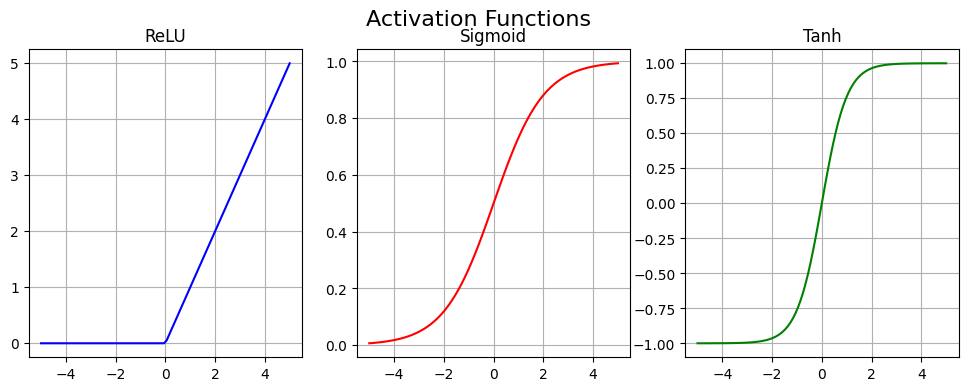

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 100)
relu = np.maximum(0, z)
sigmoid = 1 / (1 + np.exp(-z))
tanh = np.tanh(z)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(z, relu, color='blue')
plt.title("ReLU")
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(z, sigmoid, color='red')
plt.title("Sigmoid")
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(z, tanh, color='green')
plt.title("Tanh")
plt.grid(True)

plt.suptitle("Activation Functions", fontsize=16)
plt.show()


Activation functions introduce non-linearity into neural networks.

Without them:
- Multiple layers collapse into a single linear transformation
- Neural networks lose expressive power

From the plots:
- **ReLU** is simple and efficient, but can produce dead neurons
- **Sigmoid** squashes outputs between 0 and 1, but suffers from vanishing gradients
- **Tanh** is zero-centered but still saturates at extremes

In practice, ReLU (or its variants) is the default choice for hidden layers.

# Bias–Variance Tradeoff

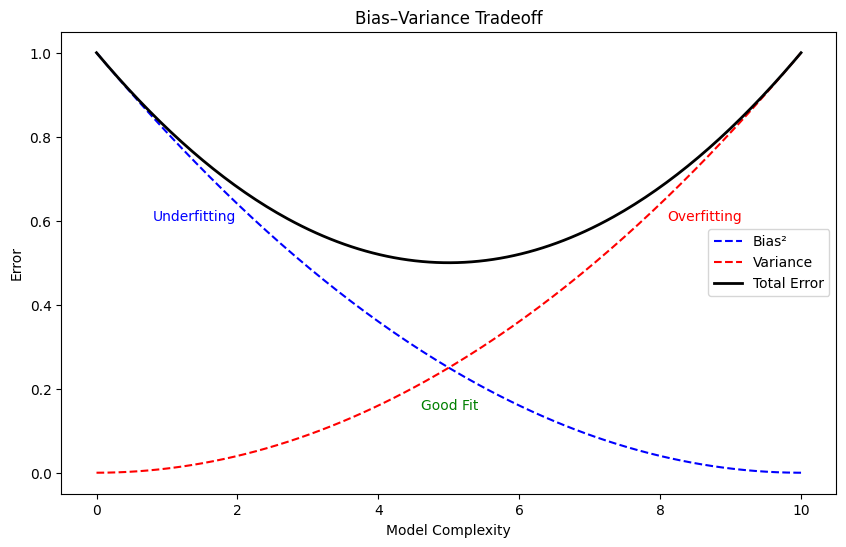

In [2]:
complexity = np.linspace(0, 10, 200)
bias2 = (10 - complexity)**2 / 100
variance = complexity**2 / 100
total_error = bias2 + variance

plt.figure(figsize=(10,6))
plt.plot(complexity, bias2, '--', color='blue', label='Bias²')
plt.plot(complexity, variance, '--', color='red', label='Variance')
plt.plot(complexity, total_error, color='black', linewidth=2, label='Total Error')
plt.text(0.8, 0.6, "Underfitting", fontsize=10, color='blue')
plt.text(4.6, 0.15, "Good Fit", fontsize=10, color='green')
plt.text(8.1, 0.6, "Overfitting", fontsize=10, color='red')
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.title("Bias–Variance Tradeoff")
plt.legend()
plt.grid(False)
plt.show()


This plot visualizes the bias–variance tradeoff, one of the most important ideas in machine learning.

- **Bias²** decreases as model complexity increases
- **Variance** increases as the model becomes more flexible
- **Total error** is the sum of both (plus irreducible noise)

Key regions:
- Left side → underfitting (high bias)
- Middle → optimal generalization
- Right side → overfitting (high variance)

The goal of model training is not minimum training loss, but minimum total error on unseen data.


# Loss Curves Example

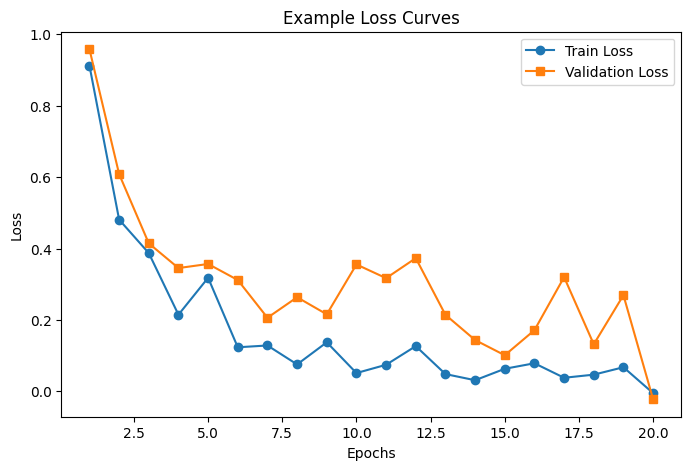

In [3]:
epochs = np.arange(1, 21)
train_loss = 1/epochs + 0.05*np.random.randn(20)  # simulated decreasing train loss
val_loss = 1/epochs + 0.1*np.random.randn(20) + 0.1 # simulated validation loss

plt.figure(figsize=(8,5))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Example Loss Curves')
plt.legend()
plt.grid(False)
plt.show()


Loss curves are one of the most powerful diagnostic tools in deep learning.

Interpretation:
- Training loss ↓ steadily → model is learning
- Validation loss ↓ then ↑ → overfitting starts
- Both losses high → underfitting

These curves guide decisions such as:
- Early stopping
- Model complexity
- Regularization strength

Loss curves are evidence, not decoration.


# PyTorch Mini Training Loop Example

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Sample dataset
torch.manual_seed(42)
X = torch.randn(200, 2)
y = X[:,0]*2 + X[:,1]*-3 + torch.randn(200)*0.5
y = y.unsqueeze(1)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Simple linear model
model = nn.Linear(2,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training Loop
epochs = 50
for epoch in range(epochs):

    model.train()                                
    running_loss = 0
    for xb,yb in loader:
        optimizer.zero_grad()                     
        preds = model(xb)                         
        loss = criterion(preds, yb)               
        loss.backward()                           
        optimizer.step()                         
        running_loss += loss.item() * xb.size(0)  
    running_loss /= len(loader.dataset)           
    if epoch %10 == 0:                           
        print(f"Epoch {epoch}: Loss = {running_loss:.4f}") 

Epoch 0: Loss = 6.6718
Epoch 10: Loss = 0.3366
Epoch 20: Loss = 0.2362
Epoch 30: Loss = 0.2341
Epoch 40: Loss = 0.2338


This shows the canonical (the standard, authoritative, widely accepted version ) PyTorch training loop.

Each iteration follows the same logic:
1. Forward pass → compute predictions
2. Loss computation → measure error
3. Backward pass → compute gradients
4. Optimizer step → update parameters

PyTorch automates gradient computation using autograd, but the mathematical process remains the same as manual backpropagation.

Understanding this loop is mandatory before using high-level abstractions.


# Phase 02 Summary Takeaways

- Forward propagation → understanding how neurons compute outputs  
- Backpropagation → gradient computation and weight update intuition  
- Activation functions → ReLU, Sigmoid, Tanh, their role in non-linearity  
- Training loop → forward, loss, backward, optimizer step  
- Overfitting vs Underfitting → bias-variance tradeoff, loss curves  
- Validation & Test Split → prevents data leakage, monitors generalization  
- Hyperparameters → learning rate, batch size, epochs, grid search  

> This phase sets the foundation for building more complex networks (CNNs, RNNs) and practical training pipelines.

---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
